In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# WELFake dataset

In [2]:
df = pd.read_csv('../datasets/WELFake_Dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/WELFake_Dataset.csv'

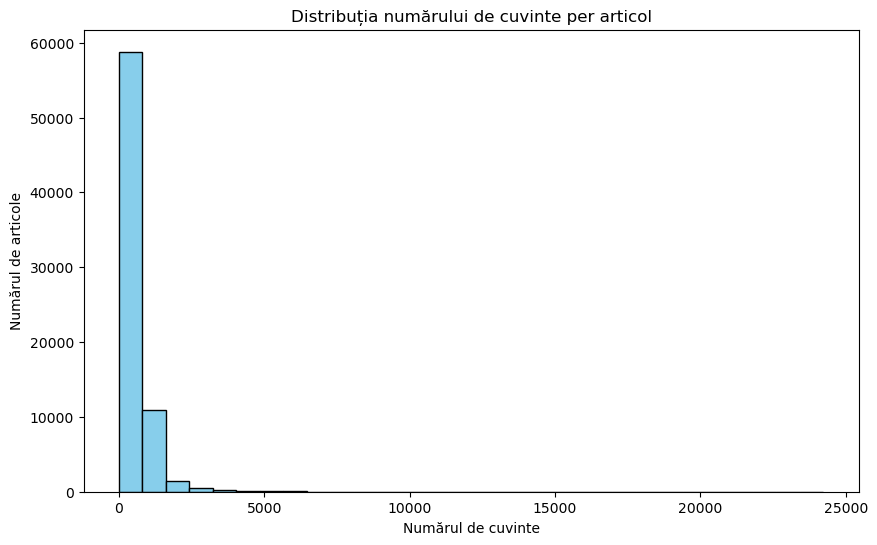

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins=300, color='skyblue', edgecolor='black')
plt.xlabel('Numărul de cuvinte')
plt.ylabel('Numărul de articole')
plt.title('Distribuția numărului de cuvinte per articol')
plt.show()

In [36]:
mean_wc = df['word_count'].mean()
median_wc = df['word_count'].median()
min_wc = df['word_count'].min()
max_wc = df['word_count'].max()
print(f"Media numărului de cuvinte: {mean_wc:.2f}")
print(f"Mediana numărului de cuvinte: {median_wc}")
print(f"Minim: {min_wc} | Maxim: {max_wc}")

Media numărului de cuvinte: 540.55
Mediana numărului de cuvinte: 398.0
Minim: 0 | Maxim: 24234


Distribuția etichetelor:
label
1    37106
0    35028
Name: count, dtype: int64


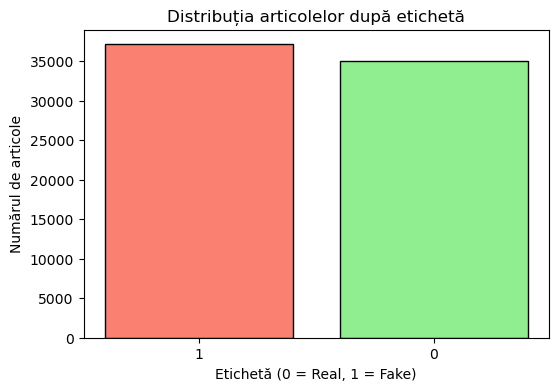

In [37]:
label_counts = df['label'].value_counts()
print("Distribuția etichetelor:")
print(label_counts)

plt.figure(figsize=(6,4))
plt.bar(label_counts.index.astype(str), label_counts.values, 
        color=['salmon', 'lightgreen'], edgecolor='black')
plt.xlabel('Etichetă (0 = Real, 1 = Fake)')
plt.ylabel('Numărul de articole')
plt.title('Distribuția articolelor după etichetă')
plt.show()

In [3]:
csv_file = "welFake_nb/performance_results.csv"
df_csv = pd.read_csv(csv_file)

In [4]:
transformer_models = []
for _, row in df_csv.iterrows():
    model_name = row["model_path"].replace("saved_models/", "")
    accuracy = row["eval_accuracy"]
    precision = row["eval_precision"]
    recall = row["eval_recall"]
    f1 = row["eval_f1"]
    
    transformer_models.append({
        "model_name": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

df_transformers = pd.DataFrame(transformer_models)

In [5]:
df_transformers

,model_name,accuracy,precision,recall,f1
0,roberta_torch_model,0.996394,0.996394,0.996394,0.996394
1,roberta2_torch_model,0.998045,0.998045,0.998045,0.998045


In [6]:
json_file = "welFake_nb/saved_models/results_summary.json"
with open(json_file, "r") as f:
    data = json.load(f)

In [ ]:
classic_models = []
for item in data["results"]:
    model_name = f"{item['classifier']} + {item['vectorizer']}"
    
    accuracy = item["accuracy"]
    
    weighted_avg = item["report"]["weighted avg"]
    precision = weighted_avg["precision"]
    recall = weighted_avg["recall"]
    f1 = weighted_avg["f1-score"]
    
    classic_models.append({
        "model_name": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

df_classics = pd.DataFrame(classic_models)

In [8]:
df_classics

,model_name,accuracy,precision,recall,f1
0,RandomForest + Bag_of_Words_(1-3gram),0.934808,0.934876,0.934808,0.934816
1,LogisticRegression + Bag_of_Words_(1-3gram),0.964145,0.964492,0.964145,0.964123
2,NaiveBayes + Bag_of_Words_(1-3gram),0.939802,0.941308,0.939802,0.939802
3,SVM + Bag_of_Words_(1-3gram),0.953048,0.953449,0.953048,0.953016
4,KNN + Bag_of_Words_(1-3gram),0.669949,0.731163,0.669949,0.642194
5,RandomForest + TFIDF_(1-3gram),0.925029,0.925385,0.925029,0.924977
6,LogisticRegression + TFIDF_(1-3gram),0.946460,0.946591,0.946460,0.946468
7,NaiveBayes + TFIDF_(1-3gram),0.910881,0.912176,0.910881,0.910885
8,SVM + TFIDF_(1-3gram),0.960122,0.960280,0.960122,0.960129
9,KNN + TFIDF_(1-3gram),0.517997,0.742854,0.517997,0.357856


In [9]:
df_all = pd.concat([df_transformers, df_classics], ignore_index=True)

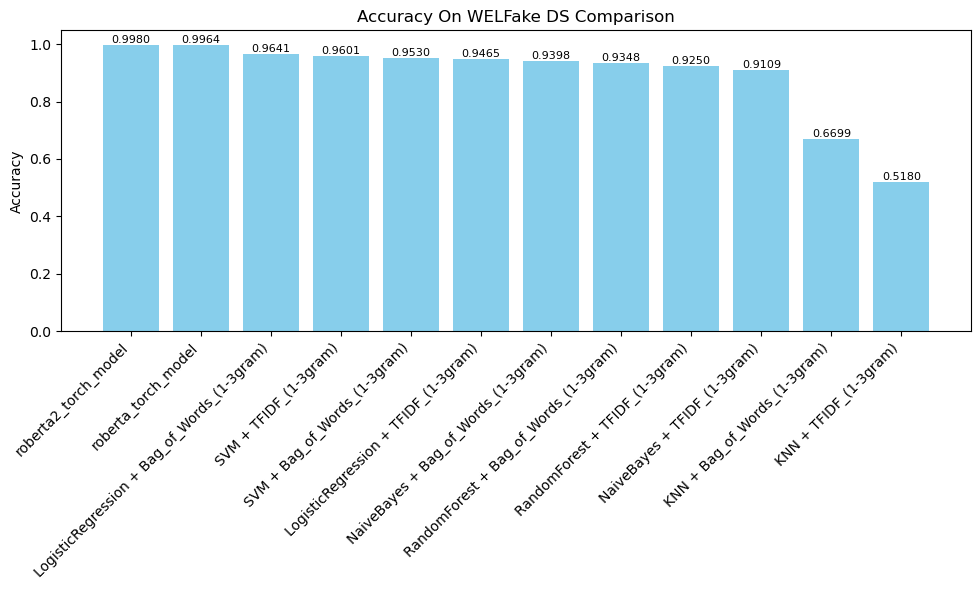

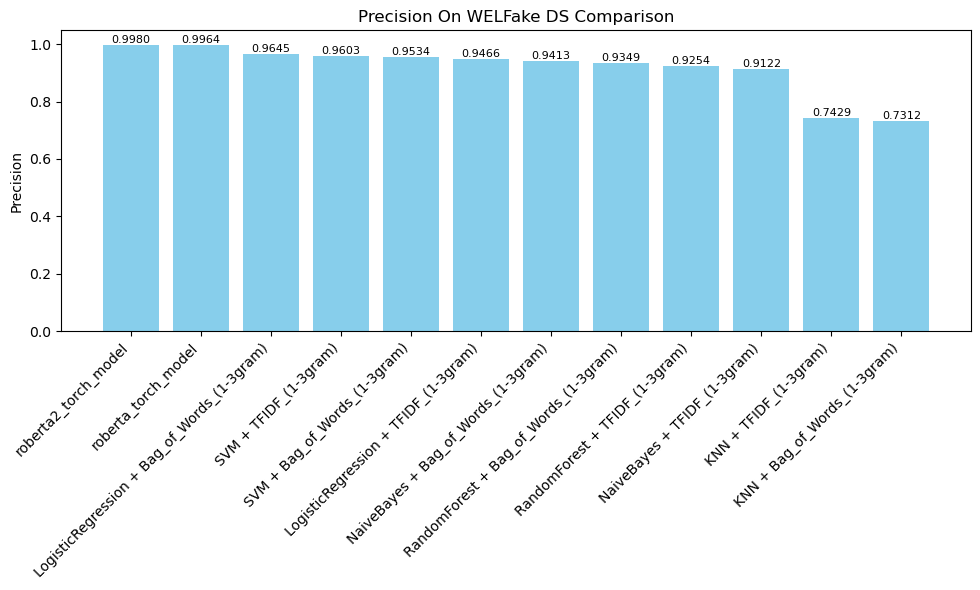

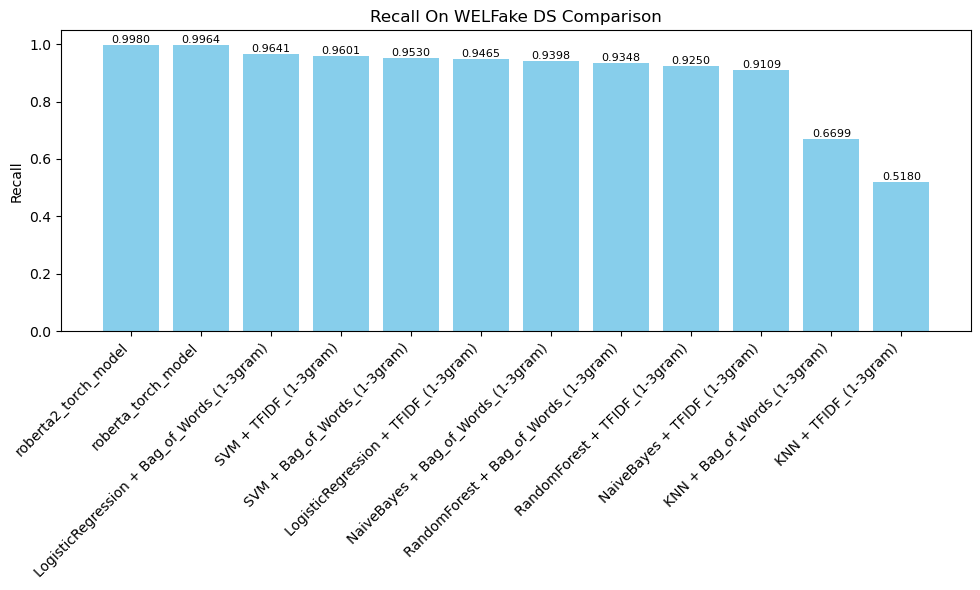

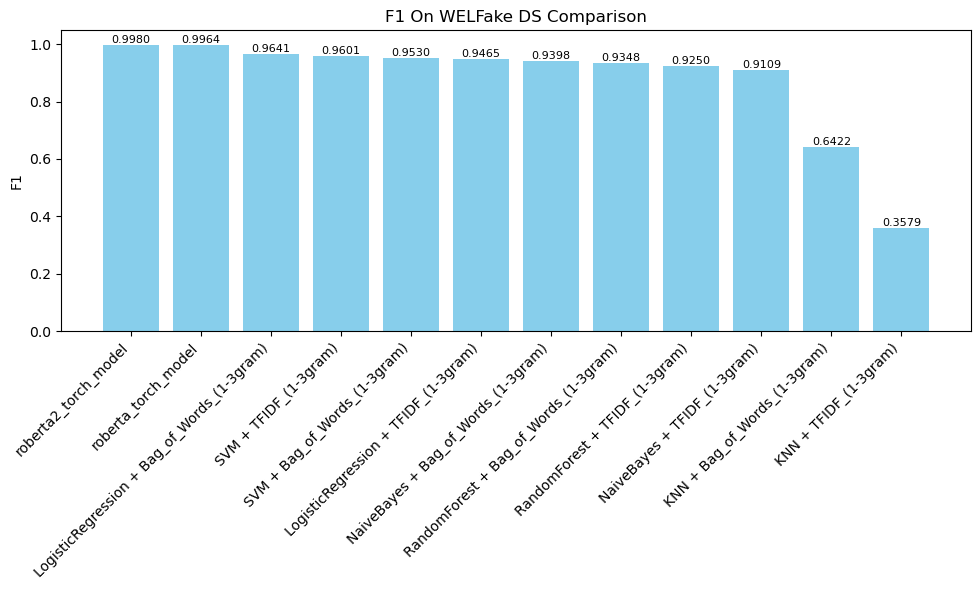

In [ ]:
metrics = ["accuracy", "precision", "recall", "f1"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    df_all_sorted = df_all.sort_values(by=metric, ascending=False)
    
    bars = plt.bar(df_all_sorted["model_name"], df_all_sorted[metric], color="skyblue")
    
    plt.title(f"{metric.capitalize()} On WELFake DS Comparison")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha="right")
    
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,  
            height,                         
            f"{height:.4f}",                
            ha="center",                     
            va="bottom",                   
            #rotation=90,                     
            fontsize=8                     
        )
    
    plt.tight_layout()
    #plt.savefig(f"{metric}_comparison.png", dpi=120)
    plt.show()

# Combined Corpus Dataset

In [3]:
df = pd.read_csv('../datasets/Combined_Corpus/All.csv')

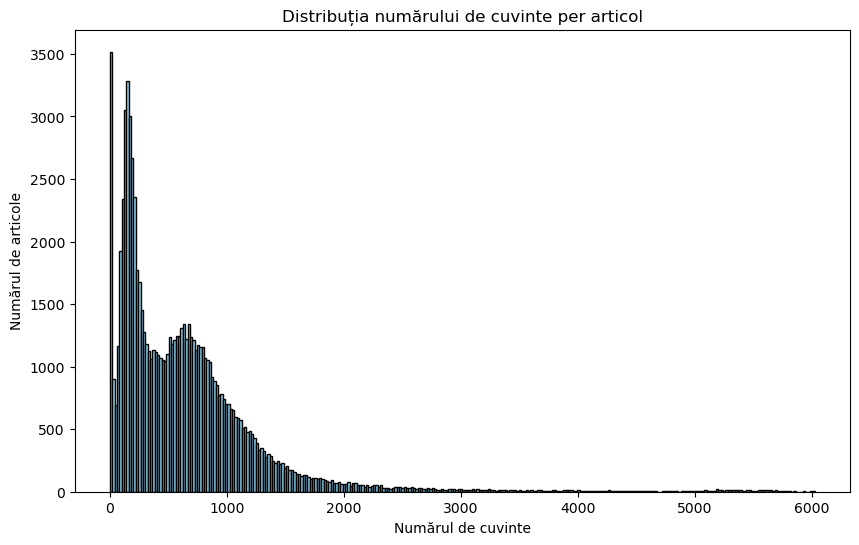

In [4]:
plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins=300, color='skyblue', edgecolor='black')
plt.xlabel('Numărul de cuvinte')
plt.ylabel('Numărul de articole')
plt.title('Distribuția numărului de cuvinte per articol')
plt.show()

In [27]:
mean_wc = df['word_count'].mean()
median_wc = df['word_count'].median()
min_wc = df['word_count'].min()
max_wc = df['word_count'].max()
print(f"Media numărului de cuvinte: {mean_wc:.2f}")
print(f"Mediana numărului de cuvinte: {median_wc}")
print(f"Minim: {min_wc} | Maxim: {max_wc}")

Media numărului de cuvinte: 647.72
Mediana numărului de cuvinte: 511.0
Minim: 1 | Maxim: 6025


Distribuția etichetelor:
Label
1    45430
0    41101
Name: count, dtype: int64


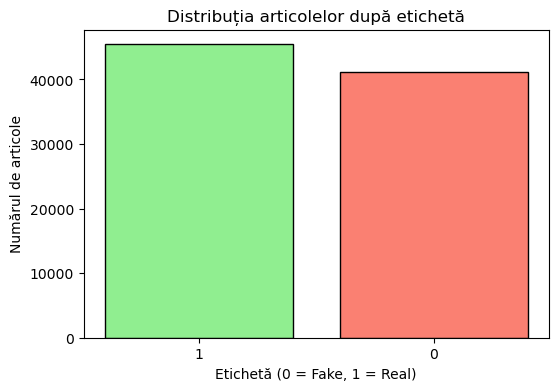

In [32]:
label_counts = df['Label'].value_counts()
print("Distribuția etichetelor:")
print(label_counts)

plt.figure(figsize=(6,4))
plt.bar(label_counts.index.astype(str), label_counts.values, 
        color=['lightgreen', 'salmon'], edgecolor='black')
plt.xlabel('Etichetă (0 = Fake, 1 = Real)')
plt.ylabel('Numărul de articole')
plt.title('Distribuția articolelor după etichetă')
plt.show()

In [11]:
csv_file2 = "combined_corpus_nb/performance_results.csv"
df_csv2 = pd.read_csv(csv_file2)

In [12]:
transformer_models2 = []
for _, row in df_csv.iterrows():
    model_name2 = row["model_path"].replace("saved_models/", "")
    accuracy2 = row["eval_accuracy"]
    precision2 = row["eval_precision"]
    recall2 = row["eval_recall"]
    f12 = row["eval_f1"]
    
    transformer_models2.append({
        "model_name": model_name2,
        "accuracy": accuracy2,
        "precision": precision2,
        "recall": recall2,
        "f1": f12
    })

df_transformers2 = pd.DataFrame(transformer_models2)

In [13]:
json_file2 = "combined_corpus_nb/saved_models/results_summary.json"
with open(json_file2, "r") as f:
    data2 = json.load(f)

In [ ]:
classic_models2 = []
for item in data2["results"]:
    model_name2 = f"{item['classifier']} + {item['vectorizer']}"
    
    accuracy2 = item["accuracy"]
    
    weighted_avg2 = item["report"]["weighted avg"]
    precision2 = weighted_avg2["precision"]
    recall2 = weighted_avg2["recall"]
    f12 = weighted_avg2["f1-score"]
    
    classic_models2.append({
        "model_name": model_name2,
        "accuracy": accuracy2,
        "precision": precision2,
        "recall": recall2,
        "f1": f12
    })

df_classics2 = pd.DataFrame(classic_models2)

In [15]:
df_all2 = pd.concat([df_transformers2, df_classics2], ignore_index=True)

In [16]:
df_all2

,model_name,accuracy,precision,recall,f1
0,roberta_torch_model,0.996394,0.996394,0.996394,0.996394
1,roberta2_torch_model,0.998045,0.998045,0.998045,0.998045
2,RandomForest + Bag_of_Words_(1-3gram),0.965290,0.966006,0.965290,0.965330
3,LogisticRegression + Bag_of_Words_(1-3gram),0.977102,0.977112,0.977102,0.977105
4,NaiveBayes + Bag_of_Words_(1-3gram),0.897565,0.902661,0.897565,0.896647
5,SVM + Bag_of_Words_(1-3gram),0.962685,0.963660,0.962685,0.962734
6,KNN + Bag_of_Words_(1-3gram),0.746305,0.759222,0.746305,0.746026
7,RandomForest + TFIDF_(1-3gram),0.965350,0.966071,0.965350,0.965391
8,LogisticRegression + TFIDF_(1-3gram),0.975769,0.975828,0.975769,0.975778
9,NaiveBayes + TFIDF_(1-3gram),0.946632,0.947136,0.946632,0.946525


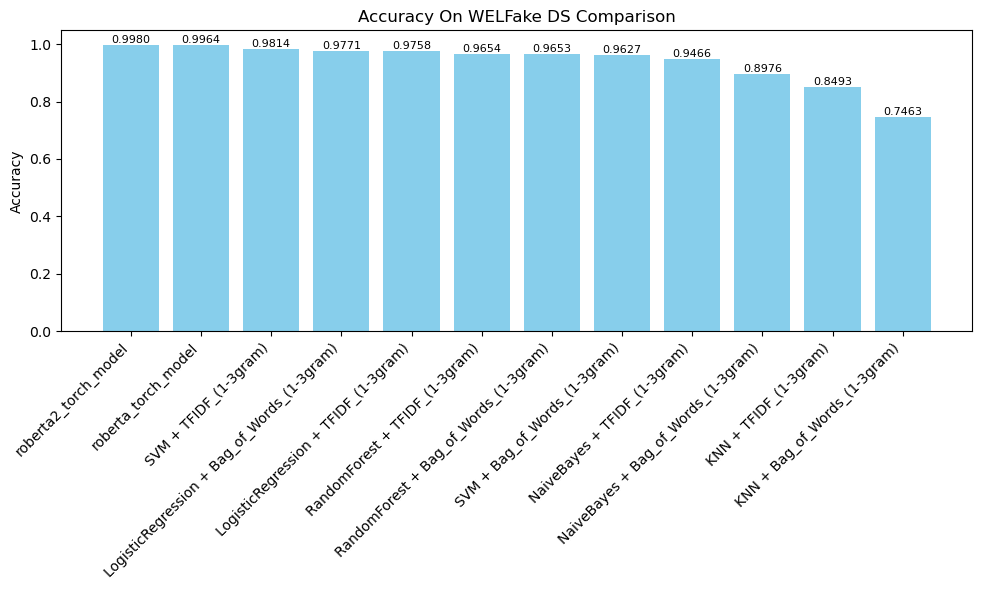

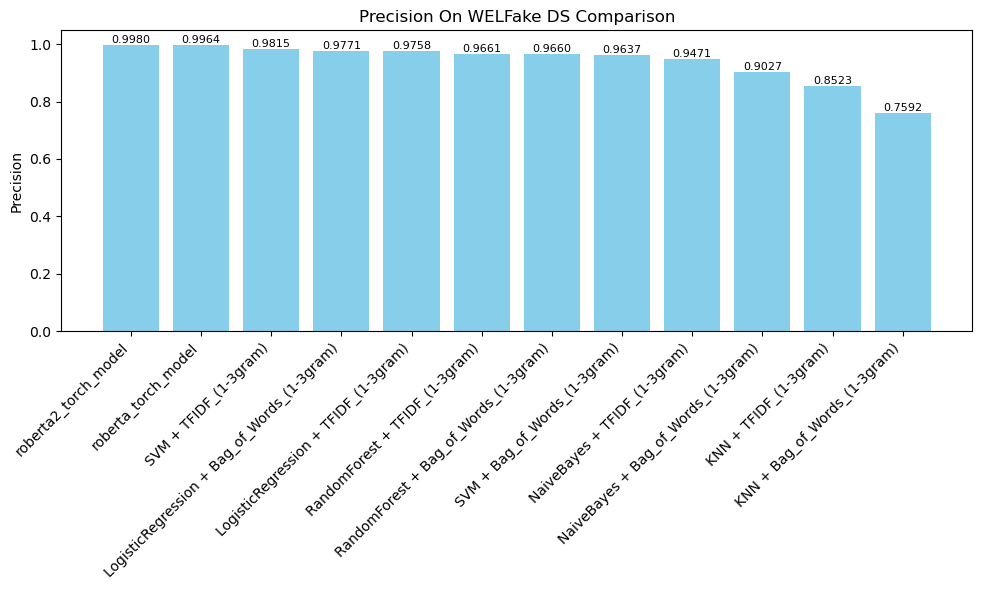

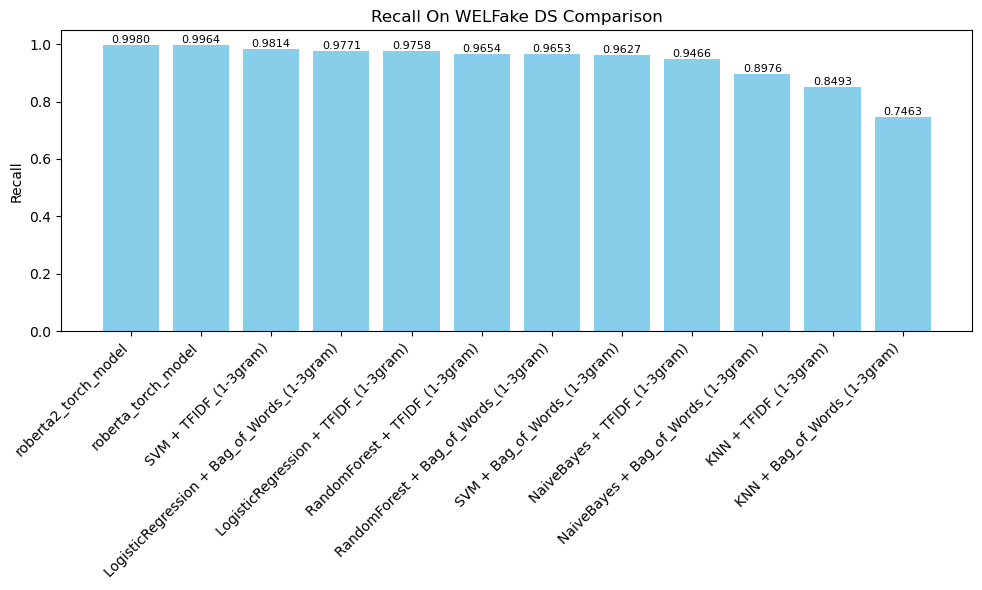

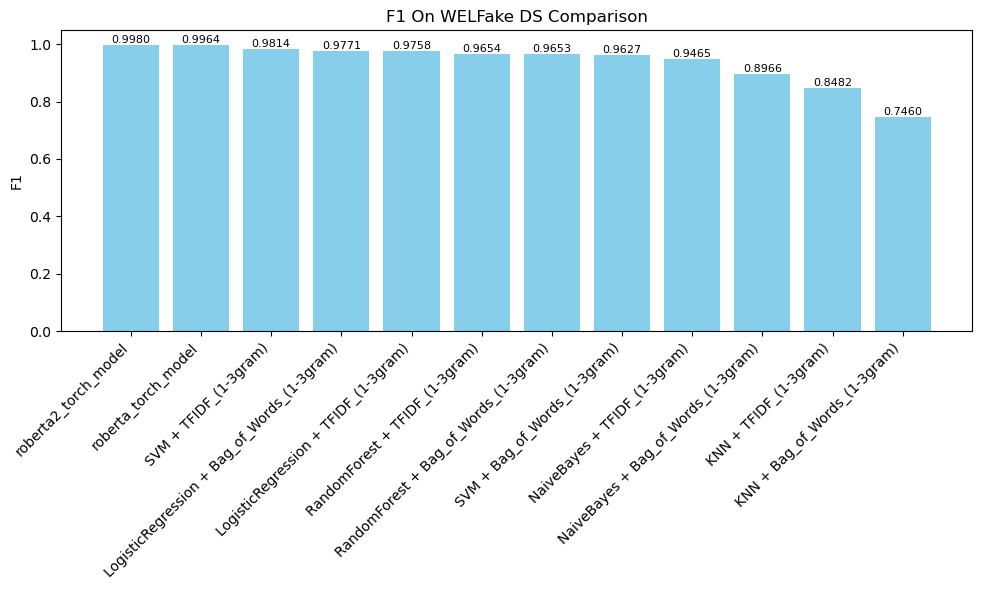

In [ ]:
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    df_all_sorted2 = df_all2.sort_values(by=metric, ascending=False)
    
    bars = plt.bar(df_all_sorted2["model_name"], df_all_sorted2[metric], color="skyblue")
    
    plt.title(f"{metric.capitalize()} On WELFake DS Comparison")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha="right")
    
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,                          
            f"{height:.4f}",                 
            ha="center",                     
            va="bottom",                     
            #rotation=90,                     
            fontsize=8                       
        )
    
    plt.tight_layout()
    #plt.savefig(f"{metric}_comparison.png", dpi=120)
    plt.show()

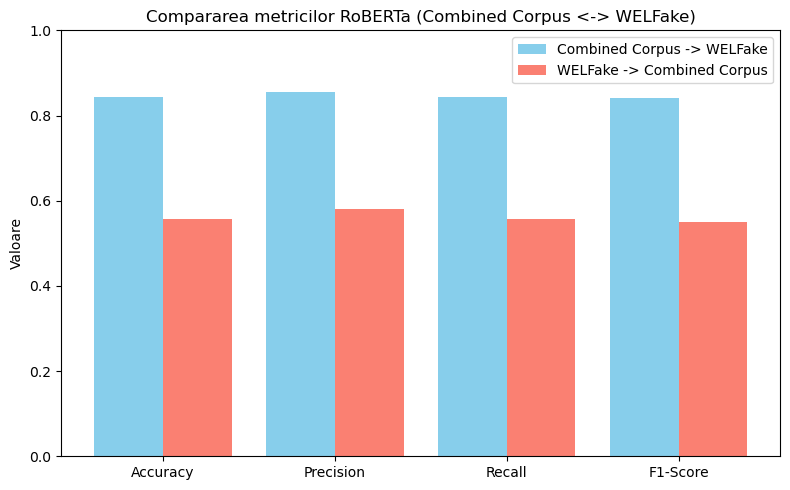

In [19]:
import re
def parse_metrics(filename):
   
    pattern = re.compile(r'^(Accuracy|Precision|Recall|F1-Score):\s+(\d+\.\d+)')
    results = []
    current_metrics = {}

    with open(filename, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            match = pattern.search(line)
            if match:
                metric_name = match.group(1)
                metric_value = float(match.group(2))
                current_metrics[metric_name] = metric_value

            if '===' in line and len(current_metrics) == 4:
                results.append(current_metrics)
                current_metrics = {}

        if len(current_metrics) == 4:
            results.append(current_metrics)

    return results

def plot_metrics(results, labels):
  
    metrics_order = ["Accuracy", "Precision", "Recall", "F1-Score"]

    data = []
    for r in results:
        data.append([r[m] for m in metrics_order])

    x = range(len(metrics_order))
    width = 0.4  

    plt.figure(figsize=(8,5))
    plt.bar([p - width/2 for p in x], data[0], width=width, label=labels[0], color="skyblue")
    
    plt.bar([p + width/2 for p in x], data[1], width=width, label=labels[1], color="salmon")

    plt.xticks(x, metrics_order)
    plt.ylim(0, 1) 
    plt.ylabel("Valoare")
    plt.title("Compararea metricilor RoBERTa (Combined Corpus <-> WELFake)")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    filename = "combined_corpus_nb/rezultate_roberta_welfake.txt"
    results = parse_metrics(filename)

    labels = ["Combined Corpus -> WELFake","WELFake -> Combined Corpus"]

    plot_metrics(results, labels)
